# Performance Comparison : Benchmark v SRS v ELO 

In [6]:
import pandas as pd 
import seaborn as sns
import drive 

# mounting ggdrive 
drive.mount('/content/drive')

Mounted at /content/drive


In [20]:
elo_results_df = pd.read_csv('/content/drive/MyDrive/Classes/Sports Analytics/Sports Analytics - Project/Data/results/elo_results.csv')
srs_results_df = pd.read_csv('/content/drive/MyDrive/Classes/Sports Analytics/Sports Analytics - Project/Data/results/srs_results.csv')

combined_results = pd.DataFrame()
combined_results['year'] = elo_results_df['Unnamed: 0']
combined_results['benchmark_accuracy'] = elo_results_df['benchmark_accuracy']
combined_results['elo_accuracy'] = elo_results_df['accuracy']
combined_results['srs_accuracy'] = srs_results_df.loc[2:,'accuracy'].reset_index(drop=True)
combined_results['elo_brier_score'] = elo_results_df['brier_score']
combined_results['srs_brier_score'] = srs_results_df.loc[2:,'brier_score'].reset_index(drop=True)

In [21]:
combined_results

,year,benchmark_accuracy,elo_accuracy,srs_accuracy,elo_brier_score,srs_brier_score
0,2004,0.627,0.634,0.510,0.228,0.281
1,2005,0.648,0.635,0.517,0.225,0.262
2,2006,0.640,0.651,0.505,0.216,0.274
3,2007,0.638,0.650,0.504,0.221,0.269
4,2008,0.659,0.662,0.524,0.218,0.272
5,2009,0.659,0.675,0.533,0.206,0.271
6,2010,0.659,0.673,0.510,0.213,0.273
7,2011,0.662,0.662,0.519,0.213,NaN
8,2012,0.662,0.686,0.533,0.200,0.260
9,2013,0.647,0.656,0.515,0.213,NaN


In [24]:
print("Accuracy Comparison")

print("Average Benchmark Accuracy : {}".format(round(combined_results['benchmark_accuracy'].mean(),3)))
print("Average ELO Accuracy : {}".format(round(combined_results['elo_accuracy'].mean(),3)))
print("Average SRS Accuracy : {}".format(round(combined_results['srs_accuracy'].mean(),3)))

Accuracy Comparison
Average Benchmark Accuracy : 0.646
Average ELO Accuracy : 0.65
Average SRS Accuracy : 0.517


In [26]:
print("Brier Score Comparison")

print("Average ELO Brier Score : {}".format(round(combined_results['elo_brier_score'].mean(),3)))
print("Average SRS Brier Score : {}".format(round(combined_results['srs_brier_score'].mean(),3)))

Brier Score Comparison
Average ELO Brier Score : 0.22
Average SRS Brier Score : 0.274


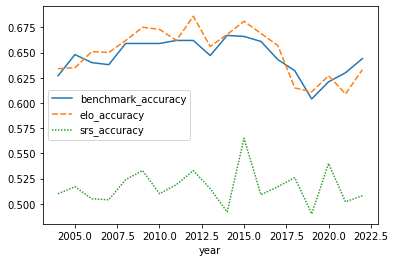

In [30]:
accuracy_df = combined_results[['benchmark_accuracy','elo_accuracy','srs_accuracy']].set_index(combined_results['year'])
sns.lineplot(data=accuracy_df)